# Graph and matrix

$\huge E \subset V\times V$

**Adjacency matrix** is one of the most convenient ways to store the simple graph.

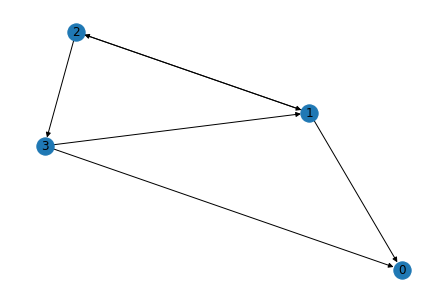

In [2]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

M = np.matrix([
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 1, 0, 0]
])

G = nx.DiGraph()
# G.add_nodes_from(range(M.shape[0]))

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if M[i,j]:
            G.add_edge(i, j)
            
nx.draw(G, with_labels=True)
plt.show()

### Closure

Closure $R^*$ of a relation $R$ for a property $P$ (e.g. transitivity, reflexivity):
- $R$, $R^*$ are a relations
- $R \subset R^*$ 
- $R^*$ has $P$
- $\forall Q$ with $P, R^*\subset Q$ ($R^*$ is a minimal such $Q$)

### Reachability matrix
is a **closure** of adjacency matrix for **transitivity**.

[[0 0 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [1 1 0 0]]

[[0 0 0 0]
 [0 1 0 1]
 [2 1 1 0]
 [1 0 1 0]]

[[0 0 0 0]
 [0 1 0 1]
 [1 1 1 0]
 [1 0 1 0]]


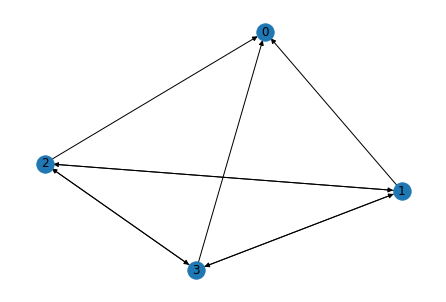

In [3]:
print(M)
print()
print(M @ M)
print()
print((M @ M > 0) * 1)

G = nx.DiGraph()
MR = np.maximum(M @ M, M, M @ M @ M) > 0  
for i in range(MR.shape[0]):
    for j in range(MR.shape[1]):
        if MR[i, j]:
            G.add_edge(i, j)
            
nx.draw(G, with_labels=True)
plt.show()

### Floyd-Warshall algorithm 

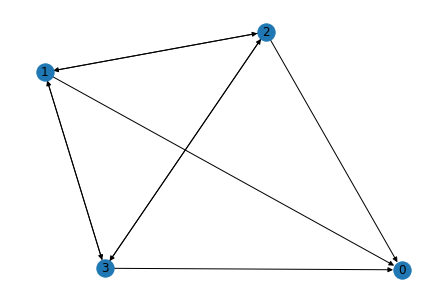

In [4]:
n = M.shape[0]
MR = M.copy()

G = nx.DiGraph()
for k in range(n):
    for i in range(n):
        for j in range(n):
            MR[i, j] = MR[i, j] or (MR[i, k] and MR[k, j])
            
for i in range(MR.shape[0]):
    for j in range(MR.shape[1]):
        if MR[i, j]:
            G.add_edge(i, j)
            
nx.draw(G, with_labels=True)
plt.show()

## Incidence matrix
Can encode loops and multigraphs. 1 is written if incident. -1 for incoming edges in digraphs.

$B \in\mathbb{R}^{|V|\times|E|}$.

$L = B\times B^T$ is called Laplacian matrix:

${\displaystyle L_{i,j}:={\begin{cases}\deg(v_{i})&{\mbox{if}}\ i=j\\-1&{\mbox{if}}\ i\neq j\ {\mbox{and}}\ v_{i}{\mbox{ is adjacent to }}v_{j}\\0&{\mbox{otherwise}}\end{cases}}}$

[[ 1.  0.]
 [-1.  1.]
 [ 0. -1.]]


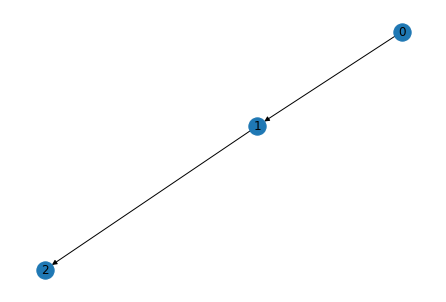

[[ 1. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  1.]]


In [22]:
B = np.zeros((3, 2))
B[0, 0] = 1
B[1, 0] = -1
B[1, 1] = 1
B[2, 1] = -1

print(B)

G = nx.DiGraph()
for i in range(B.shape[0]):
    for j in range(B.shape[0]):
        for k in range(B.shape[1]):
            if B[i, k] == 1 and B[j, k] == -1:
                G.add_edge(i, j)

nx.draw(G, with_labels=True)
plt.show()
                
print(B @ B.T)

# Spectral analysis

Undirected graph has real eigenvalues and full set of eigenvectors.

Graph spectrum is invariant to nodes order thus it is the same for all isomorphisms. Isospectral is not that strict as isomorphism.

There are few interesting theorems which involve graph spectrum. On of the basic is:
```
Number of times 0 appears in eigenvalues of Laplacian matrix is equal to number of connected components
```

[[ 1.  0. -1.  0.]
 [-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  0.  1.]]


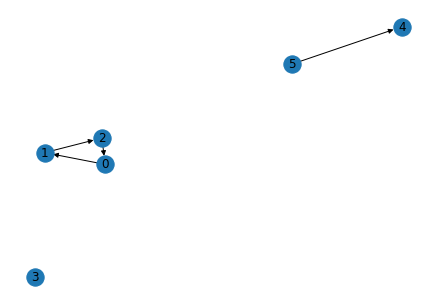

In [23]:
B = np.zeros((6, 4))
B[0, 0] = 1
B[1, 0] = -1
B[1, 1] = 1
B[2, 1] = -1
B[2, 2] = 1
B[0, 2] = -1

B[5, 3] = 1
B[4, 3] = -1

print(B)

G = nx.DiGraph()
for i in range(B.shape[0]):
    G.add_node(i)
    for j in range(B.shape[0]):
        for k in range(B.shape[1]):
            if B[i, k] == 1 and B[j, k] == -1:
                G.add_edge(i, j)
                               
nx.draw(G, with_labels=True)
plt.show()

In [16]:
np.set_printoptions(suppress=True)

L = B @ B.T  
print(L)

evals, evecs = np.linalg.eig(L)
evals[abs(evals) < 1e-15] = 0.0
print()
print(list(evals))

[[ 2. -1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [-1. -1.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

[2.9999999999999996, 0.0, 2.9999999999999996, 2.0, 0.0, 0.0]
